In [202]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
Loading the cleaned dataset

In [203]:
df = pd.read_csv("./Data/cleaned_alzheimer.csv")
X = df.drop(columns=["CDR", "Group"])
X

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,87,14,2.0,27.0,1987,0.696,0.883
1,0,88,14,2.0,30.0,2004,0.681,0.876
2,1,88,18,3.0,28.0,1215,0.710,1.444
3,1,90,18,3.0,27.0,1200,0.718,1.462
4,0,80,12,4.0,28.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...
312,0,82,16,1.0,28.0,1693,0.694,1.037
313,0,86,16,1.0,26.0,1688,0.675,1.040
314,1,61,13,2.0,30.0,1319,0.801,1.331
315,1,63,13,2.0,30.0,1327,0.796,1.323


# Elbow Plot
To find optimal K value

In [204]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce demensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2']).reset_index(drop=True)
X_pca

,PC1,PC2
0,3.553122,-1.268686
1,3.688957,-1.144726
2,-1.802586,0.244234
3,-1.937858,0.166931
4,1.098681,-1.691285
...,...,...
312,2.477068,-0.099914
313,2.601425,-0.699141
314,-1.964325,1.998091
315,-1.866496,1.861332


In [205]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca) 
    wcss.append(kmeans.inertia_)

<Axes: >

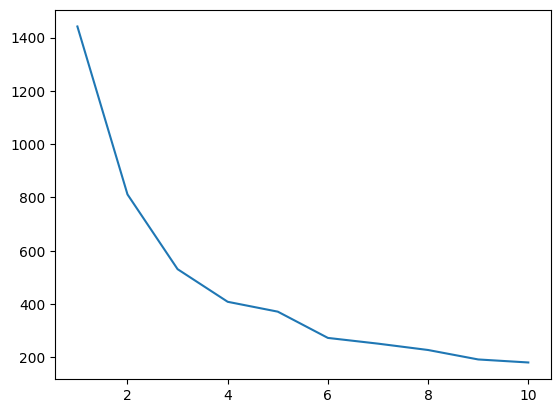

In [206]:
sns.lineplot(x = range(1, 11), y = wcss)

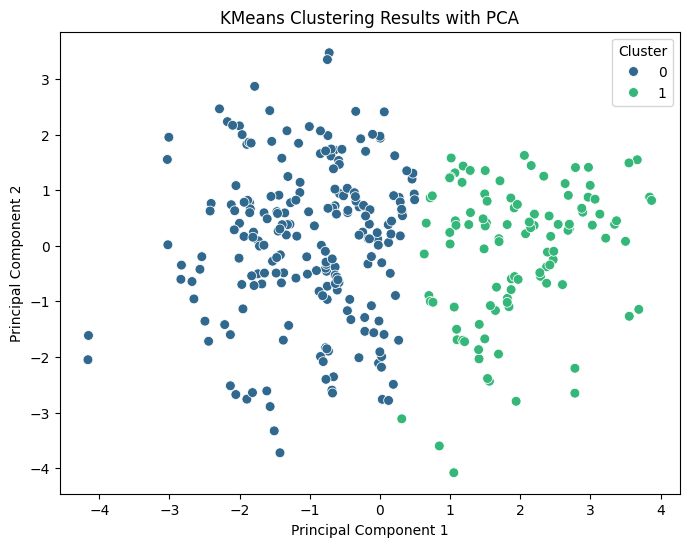

In [207]:
# Choose the number of clusters for KMeans (e.g., 2 or 3)
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_pca)

# Convert to a Data Frame and store Cluster No
X_scaled = pd.DataFrame(X_scaled, columns=X.columns).reset_index(drop=True)
X_scaled['cluster'] = clusters
X_scaled["Group"] = df["Group"]
# X_pca["cluster"] = clusters

# Plot the PCA-transformed data with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca["PC1"], y=X_pca["PC2"], hue=clusters, palette='viridis', s=50)
plt.title('KMeans Clustering Results with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


              M/F       Age      EDUC       SES      MMSE      eTIV      nWBV  \
cluster                                                                         
0        0.430235 -0.126723 -0.308274  0.273462  0.050663 -0.553409  0.234929   
1       -0.844386  0.248708  0.605024 -0.536700 -0.099432  1.086129 -0.461075   

              ASF     Group  
cluster                      
0        0.533308  0.380952  
1       -1.046680  0.439252  


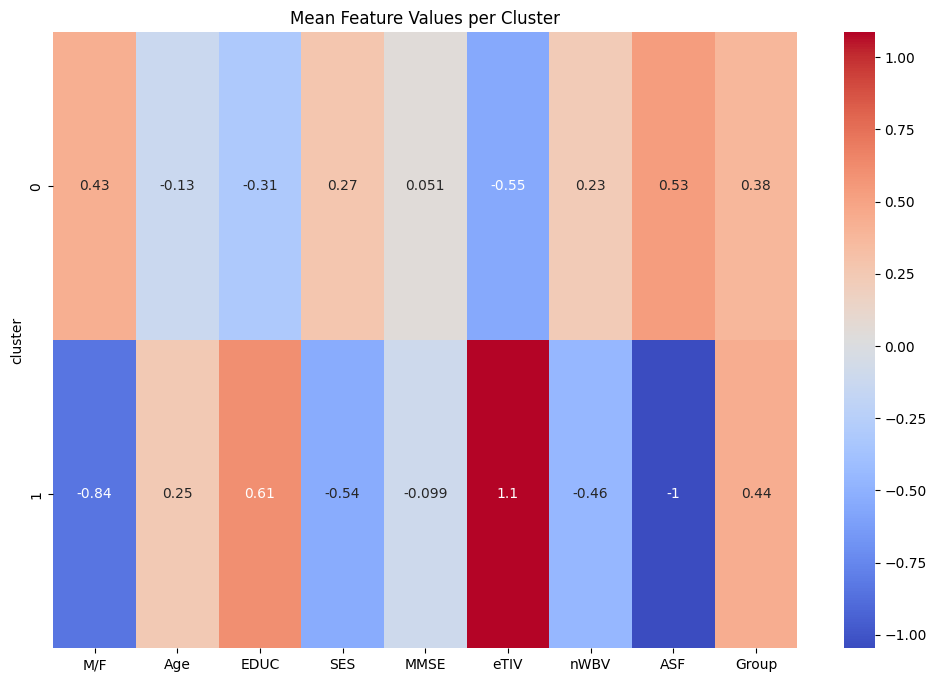

In [208]:
cluster_means = X_scaled.groupby('cluster').mean()

# Display the mean feature values for each cluster
print(cluster_means)

# Visualize the differences between clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Mean Feature Values per Cluster')
plt.show()

<Axes: xlabel='cluster', ylabel='MMSE'>

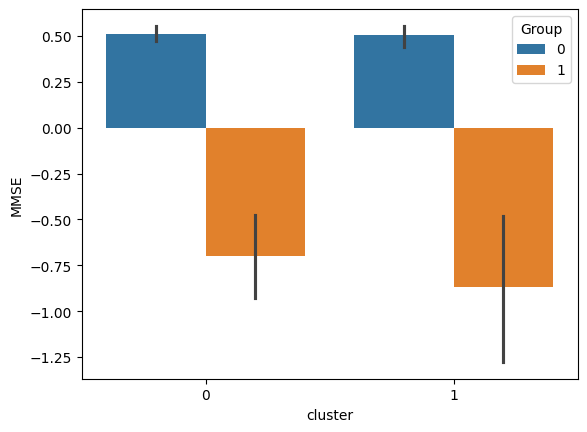

In [219]:
# Plot clusters with data
# sns.scatterplot(x=X_scaled["Group"], y=X_scaled["cluster"], hue=X_scaled["Group"], palette='viridis', s=20)
sns.barplot(x=X_scaled["cluster"], y=X_scaled["MMSE"], hue=X_scaled["Group"])